In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0 = time.time()

In [2]:
xcr = XCrystal(XCr_path+'/config/Si220_17p45keVScrewDislChukhovskii.yaml')
pp=xcr.configure(0,0)

In [3]:
omega=17450

In [4]:

def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/Si220_17p45keVScrewDislChukhovskii.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [5]:
omega0=17450

In [6]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(0e-6,omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 400/400 [01:07<00:00,  5.92it/s]


Photon energy (omega):  17450 ; Reflectivity:  0.10723896811520205 ; Transmission:  0.548194796464095


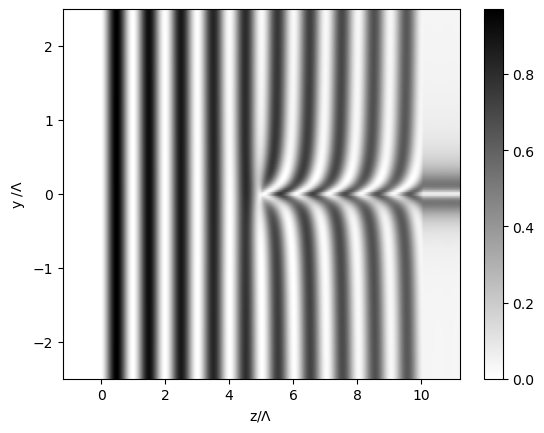

In [7]:
p=10
Lambda=36
iIndx=100
wM=xcr.M-1
plt.imshow((np.abs(U1_xyz[0,iIndx,:,0:wM]*1 + U2_xyz[0,iIndx,:,0:wM]*0)**2),extent=[-1.2,xcr.M*xcr.Z/xcr.convr*1e6/Lambda-1.2,-xcr.yy.max()/xcr.convr*1e6/Lambda,xcr.yy.max()/xcr.convr*1e6/Lambda], aspect='auto',cmap='gray_r')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
plt.ylim(-2.5,2.5)
#plt.xlim(0,10)
plt.ylabel(r'y /$\Lambda$')
plt.xlabel(r'z/$\Lambda$')
plt.colorbar()

Text(0.5, 0, 'z /$\\Lambda$')

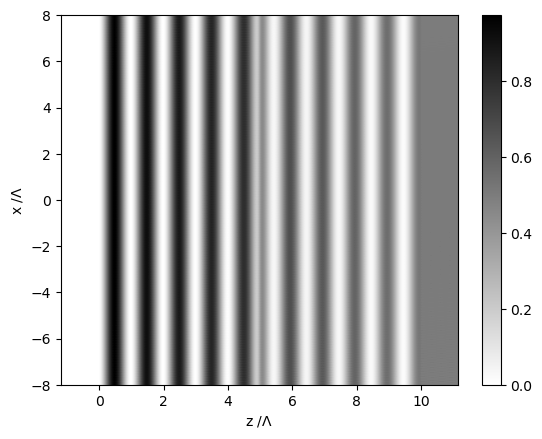

In [8]:
p=96
wM=xcr.M-1

#plt.imshow(-np.abs(1*U1_xyz[0,:,p,0:wM])**2 + 0*np.abs(U2_xyz[0,:,p,0:wM])**2, aspect='auto',cmap='gray')
abw=plt.imshow(np.abs(U1_xyz[0,50:350,p,0:wM]*1 + U2_xyz[0,50:350,p,0:wM]*0)**2,extent=[-1.2,xcr.M*xcr.Z/xcr.convr*1e6/36.2-1.2,-xcr.xx.max()*2*3/4/xcr.convr*1e6/2/36.3,xcr.xx.max()*2*3/4/xcr.convr*1e6/2/36.3],aspect='auto',cmap='gray_r')
plt.ylim(-8,8)
plt.colorbar()

#plt.imshow(np.abs(U1_xyz[0,:,p,0:wM]*1 + U2_xyz[0,:,p,0:wM]*0), aspect='auto',cmap='jet')
#plt.ylim(0, 2)
#plt.xlim(8,9)
plt.ylabel(r'x /$\Lambda$')
plt.xlabel(r'z /$\Lambda$')

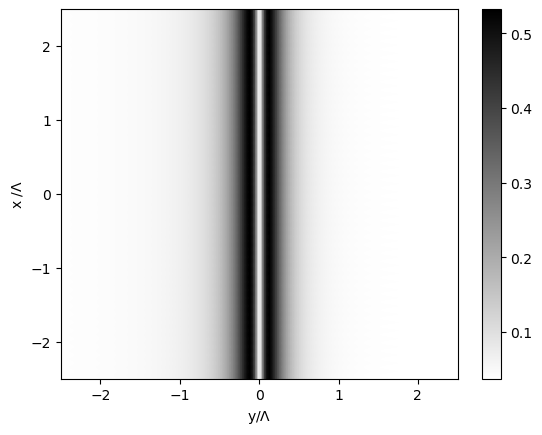

In [9]:
pp=399

Int=(np.abs(U1_xyz[0,50:350,:,pp]*1 + U2_xyz[0,50:350,:,pp]*0))**(2)
plt.imshow(Int,extent=[-xcr.yy.max()/xcr.convr*1e6/36.3,xcr.yy.max()/xcr.convr*1e6/36.3,-xcr.xx.max()*3/4/xcr.convr*1e6/36.3,xcr.xx.max()*3/4/xcr.convr*1e6/36.3], aspect='auto',cmap='gray_r')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5,2.5)
plt.ylabel(r'x /$\Lambda$')
plt.xlabel(r'y/$\Lambda$')
plt.colorbar()

In [10]:
np.argmax(Int)
indices = np.where(Int == Int.max())
indices, np.shape(Int)

((array([180]), array([95])), (300, 200))

(400, 200, 400)

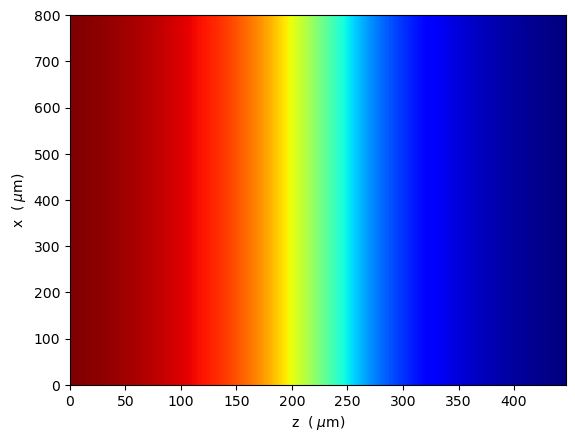

In [11]:
p=30
plt.imshow(xcr.u[:,p,0:xcr.M-1],extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(350, 800)
#plt.xlim(0,300)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
xcr.M*xcr.Z/xcr.convr*1e6
xcr.u.shape

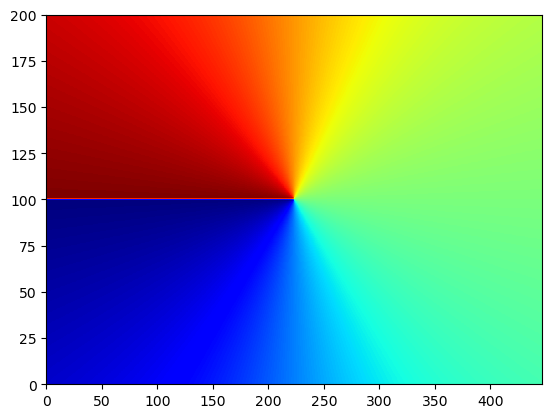

In [12]:
iIndx=85
plt.imshow(xcr.u[iIndx,:,:],extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.yy.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')

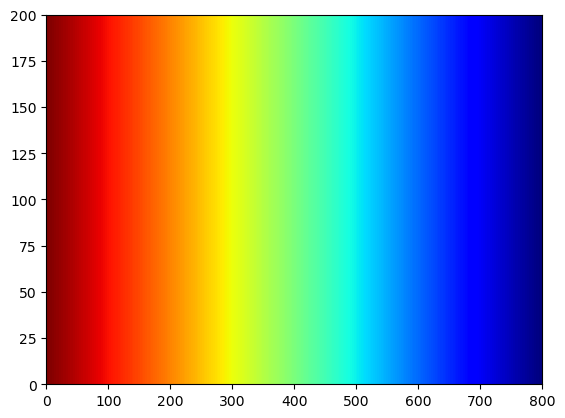

In [13]:
plt.imshow(xcr.u[:,:,350],extent=[0,xcr.xx.max()*2/xcr.convr*1e6,0,xcr.yy.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(20, 40)
#plt.xlim(480,500)

In [14]:
t1 = time.time()  
print('Time (min):', (t1 - t0)/60)

Time (min): 1.4989417632420858


In [15]:
import sys
sys.version_info

sys.version_info(major=3, minor=9, micro=15, releaselevel='final', serial=0)

In [16]:
print(sys.version)

3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:45:29) 
[GCC 10.4.0]
